# Análise de dados do Titanic
Este projeto consiste em analisar dados sobre passageiros do Titanic disponíveis [no site do Kaggle](https://www.kaggle.com/c/titanic/data) para conclusão do curso Fundamentos de Data Science I do Udacity. Existe liberdade para seleção de perguntas a serem feitas sobre os dados. Todos os processos de análise dos dados serão demonstrados.
### Etapas da análise
A análise será realizada em várias etapas:
- Etapa 1: Elaboração de perguntas a serem respondidas sobre os dados

Para cada uma das perguntas definidas, a análise seguirá em outras 4 etapas:
- Etapa 2: Limpeza dos dados
- Etapa 3: Análise dos dados em si para resposta das perguntas
- Etapa 4: Tomada de conclusões

Por fim, as respostas às perguntas serão dadas todas de uma vez, considerando que essa seria a parte relevante para alguém interessado apenas nos resultados, e não no processo de análise dos dados:
- Etapa 5: Comunicação dos resultados

### Bibliotecas utilizadas
A análise será feita com o uso da linguagem Python (versão 3.6.4) e as seguintes bibliotecas:
- Pandas (leitura dos dados CSV como DataFrames) - versão 0.22.0;
- Numpy (manipulação de vetores (*arrays*) ) - versão 1.14.0
- Matplotlib (criação de gráficos) - versão 2.1.2
- Seaborn (estilização de gráficos) - versão 0.8.1

In [111]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
% matplotlib inline
import seaborn as sns

### Etapa 1: Elaboração de perguntas
Precisamos analisar pelo menos uma variável dependente e três variáveis independentes. 

In [112]:
# Lendo e conferindo os dados disponíveis
df = pd.read_csv('titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Como variáveis dependentes, identificamos: a classe do ticket (`pclass`), que depende do preço do ticket, a idade do passageiro, etc.; e a sobrevivência (`survived`), que depende, provavelmente, do sexo do passageiro, de sua idade e da classe do seu ticket.
As variáveis restantes são independentes.

Para análise de uma variável dependente, propomos a seguinte pergunta:
> **Pergunta 1: Passageiros de que faixa etária foram os que mais morreram?**

Para análise de três variáveis independentes, propomos as seguintes perguntas:
> **Pergunta 2: Qual foi o sexo mais presente no Titanic?**

> **Pergunta 3: Qual foi a média de preço do ticket?**

> **Pergunta 4: Como foi a distribuição de pessoas entre as classes do Titanic?**

## Pergunta 1: Passageiros de que faixa etária foram os que mais morreram?
### Etapa 2: Limpeza dos dados
Os dados necessários são:
- Número de passageiros que não sobreviveram, representado pela quantidade de entradas = 0 na coluna `Survived`;
- Faixas de idade, representado pela coluna `Age`.

In [113]:
# Renomeando colunas para facilitar a referência
df.rename(columns=lambda x: x.lower(), inplace=True)
df.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [114]:
# Verificando se há nomes duplicados (e, consequentemente, linhas duplicadas)
if df['name'].duplicated().sum() == 0:
    print('Não há nomes duplicados.')
else:
    print('Há nomes duplicados!')

Não há nomes duplicados.


In [115]:
# Verificando a existência de valores vazios
if df.age.isnull().values.any() == True:
    print('Há valores vazios em age.')
else:
    print('Não há valores vazios em age.')
    
if df.survived.isnull().values.any() == True:
    print('Há valores vazios em survived.')
else:
    print('Não há valores vazios em survived.')

Há valores vazios em age.
Não há valores vazios em survived.


Os valores vazios em `age` podem enviesar a resposta à pergunta. É melhor eliminar as linhas com valores vazios.

In [116]:
# Verificando se o que está vazio é apenas a coluna em questão
## Primeiro, vamos obter índices de alguma linha que tem valores vazios em 'age'
[i for i, v in df['age'].iteritems() if pd.isnull(v)][:5]

[5, 17, 19, 26, 28]

In [117]:
## Depois, vamos verificar se outras colunas de alguma dessas linhas estão completadas
df.iloc[5]

passengerid                   6
survived                      0
pclass                        3
name           Moran, Mr. James
sex                        male
age                         NaN
sibsp                         0
parch                         0
ticket                   330877
fare                     8.4583
cabin                       NaN
embarked                      Q
Name: 5, dtype: object

In [118]:
# Como é apenas a coluna age que tem valores vazios, não podemos apagar as linhas com valores vazios no DataFrame original.
# Vamos copiar os dados úteis para a pergunta em um outro DataFrame e, nele, apagar linhas com valores vazios.
df_pergunta1 = df.iloc[:, [1, 5]].dropna()
df_pergunta1

,survived,age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0
10,1,4.0


In [119]:
## Os índices das linhas retiradas foram "pulados". Precisamos renumerar as linhas.
df_pergunta1.reset_index(drop=True, inplace=True)
df_pergunta1

,survived,age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,54.0
6,0,2.0
7,1,27.0
8,1,14.0
9,1,4.0


In [120]:
# Verificando tipos dos dados. A análise de "age" é mais fácil se os dados forem float ou int.
df_pergunta1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 2 columns):
survived    714 non-null int64
age         714 non-null float64
dtypes: float64(1), int64(1)
memory usage: 11.2 KB


In [121]:
# Verificando os valores dos dados
df_pergunta1['age'].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Há alguns valores inesperados, como 0.67 e 32.5. De acordo com a documentação:
> age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

As idades de menores de 1 ano enviesam as nossas conclusões porque não permitem uma comparação direta entre menores de 1 ano e maiores de 1 ano: ao passo que nossos valores só serão relevantes para os maiores de 1 ano em faixas de 1 em 1 ano, os valores para os menores de 1 ano não estão agregados dessa mesma maneira.
As idades listadas como "xx.5" são, na verdade, "xx", o que também pode enviesar os nossos dados. As entradas de "xx.5" deveriam estar em "xx".
Desse modo, precisamos:
- Alterar a coluna `age` para os menores de 1 ano e deixá-la igual a "1";
- Alterar a coluna `age` para quem tem idade = "xx.5" e deixá-la igual a "xx".

Para a segunda alteração podemos criar dois DataFrames: um que contém tanto idades estimadas, quanto não estimadas; e um outro que contém apenas as idades sobre as quais temos certeza.

In [122]:
# Igualando valores menores que 1 a 1
df_pergunta1.loc[df_pergunta1['age'] < 1] = 1
# Verificando se deu certo
df_pergunta1.query('age < 1')

,survived,age


In [123]:
# Copiando o DataFrame em outros dois
df_pergunta1_estimado = df_pergunta1.copy()
df_pergunta1_exato = df_pergunta1.copy()

In [124]:
# No DataFrame apenas com idades exatas, precisamos remover valores no estilo "xx.5"
## Convertendo valores de age em strings
df_pergunta1_exato.age = df_pergunta1_exato.age.astype('str')
## Eliminando linhas com valores de age que terminam em ".5"
df_pergunta1_exato.drop(df_pergunta1_exato[df_pergunta1_exato.age.str[-2:] == '.5'].index, inplace = True)
## Convertendo os valores de age em int
df_pergunta1_exato.age = df_pergunta1_exato.age.astype('float')
df_pergunta1_exato.age = df_pergunta1_exato.age.astype('int')
## Renumerando as linhas
df_pergunta1_exato.reset_index(drop=True, inplace=True)
df_pergunta1_exato

,survived,age
0,0,22
1,1,38
2,1,26
3,1,35
4,0,35
5,0,54
6,0,2
7,1,27
8,1,14
9,1,4


In [125]:
# No DataFrame com idades estimadas, precisamos igualar valores no estilo "xx.5" a "xx"
df_pergunta1_estimado['age'].apply(lambda x: int(x))
# Verificando
df_pergunta1_estimado['age'].dtype

dtype('float64')

### Etapa 3: Análise dos dados em si para resposta à Pergunta 1

Criando gráficos que exibam as idades das pessoas que morreram (`survived` = 0, de acordo com a documentação):

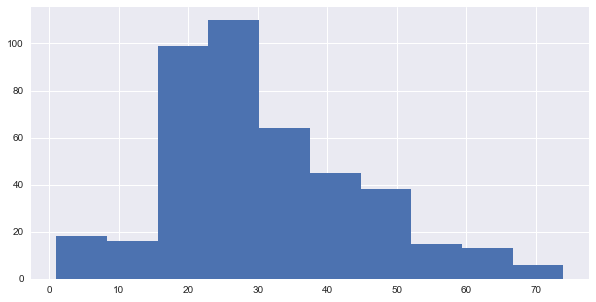

In [126]:
# Gráfico com os dados estimados
df_pergunta1_estimado.query('survived == 0')['age'].hist(figsize = (10, 5));

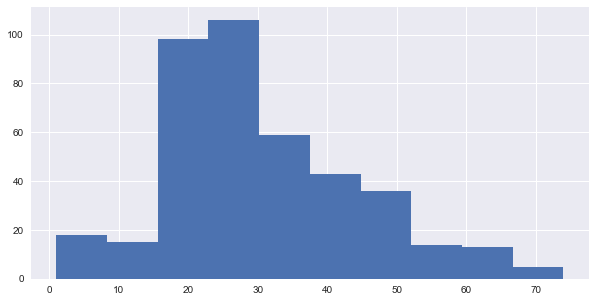

In [127]:
# Gráfico apenas com os dados exatos
df_pergunta1_exato.query('survived == 0')['age'].hist(figsize = (10, 5));

Esses gráficos contam o número de mortes de pessoas que tinham certa idade em anos, mas a pergunta fazia referência a uma faixa etária. Podemos agrupar os dados em faixas de 10 anos, desde 0 ano até 80 anos, considerando os dados que temos.

In [128]:
# Cortando as colunas age em faixas de 10 em 10 anos até 80 anos
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80]
bin_names = ['0-10 anos', '10-20 anos', '20-30 anos', '30-40 anos', '40-50 anos', '50-60 anos', '60-70 anos', '70-80 anos']
df_pergunta1_estimado['faixa_etaria'] = pd.cut(df_pergunta1_estimado['age'], bin_edges, labels=bin_names)
df_pergunta1_exato['faixa_etaria'] = pd.cut(df_pergunta1_exato['age'], bin_edges, labels=bin_names)
# Verificando algum dos DataFrames
df_pergunta1_estimado.head()

,survived,age,faixa_etaria
0,0,22.0,20-30 anos
1,1,38.0,30-40 anos
2,1,26.0,20-30 anos
3,1,35.0,30-40 anos
4,0,35.0,30-40 anos


In [129]:
# Obtendo os números de mortes em cada faixa etária
df_faixas_etarias_estimadas = df_pergunta1_estimado.query('survived == 0')['faixa_etaria'].value_counts().sort_index()
print('Mortes em cada faixa etária, contando idades estimadas:\n', df_faixas_etarias_estimadas)
df_faixas_etarias_exatas = df_pergunta1_exato.query('survived == 0')['faixa_etaria'].value_counts().sort_index()
print('\nMortes em cada faixa etária, contando apenas as idades conhecidas:\n', df_faixas_etarias_exatas)

Mortes em cada faixa etária, contando idades estimadas:
 0-10 anos      26
10-20 anos     71
20-30 anos    146
30-40 anos     86
40-50 anos     53
50-60 anos     25
60-70 anos     13
70-80 anos      4
Name: faixa_etaria, dtype: int64

Mortes em cada faixa etária, contando apenas as idades conhecidas:
 0-10 anos      26
10-20 anos     70
20-30 anos    141
30-40 anos     81
40-50 anos     49
50-60 anos     24
60-70 anos     13
70-80 anos      3
Name: faixa_etaria, dtype: int64


Percebe-se, inicialmente, que a diferença entre os dados estimados e os dados exatos não é relevante. Vamos verificar a diferença total no número de ocorrêncais:

In [130]:
len(df_pergunta1_estimado) - len(df_pergunta1_exato)

18

A diferença é pequena e não afeta as diferenças de ocorrências entre as faixas etárias. Para resposta à pergunta, podemos passar a usar apenas um dos DataFrames, sem que isso afete a resposta dada. Usaremos, daqui em diante, apenas os dados de `df_faixas_etarias_estimadas`.
Em segundo lugar, percebe-se que a faixa etária com mais mortes é a de pessoas entre 20 e 30 anos. Podemos apresentar isso em um gráfico:

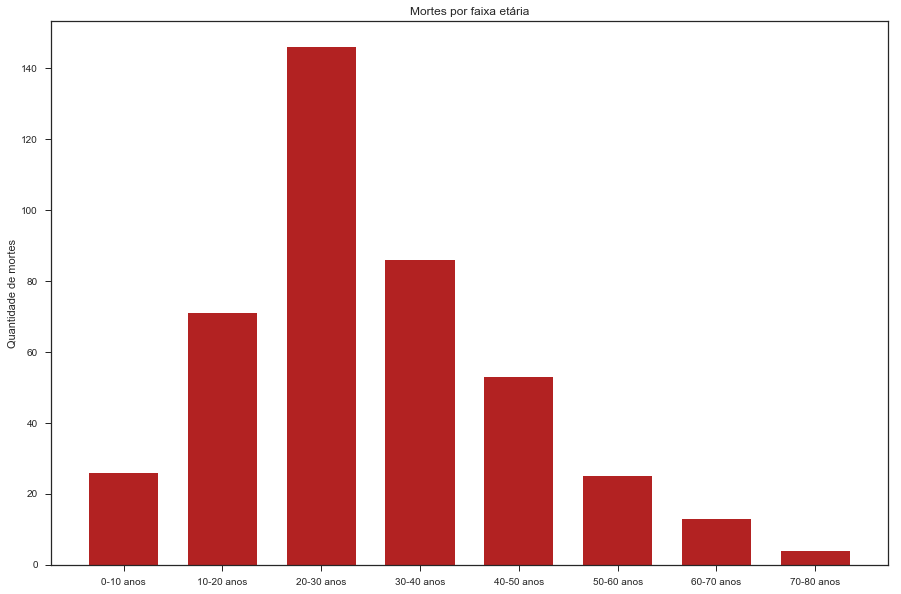

In [131]:
# Desenhando o gráfico de mortes por faixa etária

## Dados do gráfico
eixo_y_mortes = df_faixas_etarias_estimadas.values
eixo_x1 = np.arange(len(df_faixas_etarias_estimadas))

## Desenho do gráfico
sns.set_style('ticks')
mpl.pyplot.figure(figsize=(15, 10))
width = 0.7
mpl.pyplot.xticks(eixo_x1, df_faixas_etarias_estimadas.index.values.tolist())
mpl.pyplot.ylabel('Quantidade de mortes')
mpl.pyplot.title('Mortes por faixa etária')

## Chamando o gráfico
mpl.pyplot.bar(eixo_x1, eixo_y_mortes, width, color='firebrick')
mpl.pyplot.show()

As conclusões tomadas podem estar sob um viés de seleção: talvez haja mais mortes para a faixa etária de 20 a 30 anos porque é essa a faixa etária que tinha mais passageiros no Titanic. Seria útil, portanto, analisar dados proporcionais: quantos % de cada faixa etária morreu?

In [132]:
# Agrupando o DataFrame com base nas colunas survived e faixa_etaria
grouped_df1 = df_pergunta1_estimado.groupby(['faixa_etaria', 'survived']).size().unstack(fill_value=0)

# Adicionando nova coluna ao DataFrame agrupado que contém o total de pessoas de cada faixa etária
grouped_df1['total'] = grouped_df1[0] + grouped_df1[1]

# Adicionando nova coluna com valores proporcionais
grouped_df1['0/total (%)'] = ((grouped_df1[0] / grouped_df1['total'])*100).round(2)
grouped_df1['1/total (%)'] = ((grouped_df1[1] / grouped_df1['total'])*100).round(2)
grouped_df1

survived,0,1,total,0/total (%),1/total (%)
faixa_etaria,,,,,
0-10 anos,26,38,64,40.62,59.38
10-20 anos,71,44,115,61.74,38.26
20-30 anos,146,84,230,63.48,36.52
30-40 anos,86,69,155,55.48,44.52
40-50 anos,53,33,86,61.63,38.37
50-60 anos,25,17,42,59.52,40.48
60-70 anos,13,4,17,76.47,23.53
70-80 anos,4,1,5,80.00,20.00


Como se vê, a faixa etária com mais mortes foi aquela de pessoas entre 70 e 80 anos. Já a faixa etária com menos mortes foi aquela de pessoas entre 0 e 10 anos.

Podemos apresentar todas as conclusões em um gráfico com o número absoluto de pessoas que morreram e sobreviveram em cada faixa etária, além das proporções desse número perante o número total de passageiros de cada faixa etária.

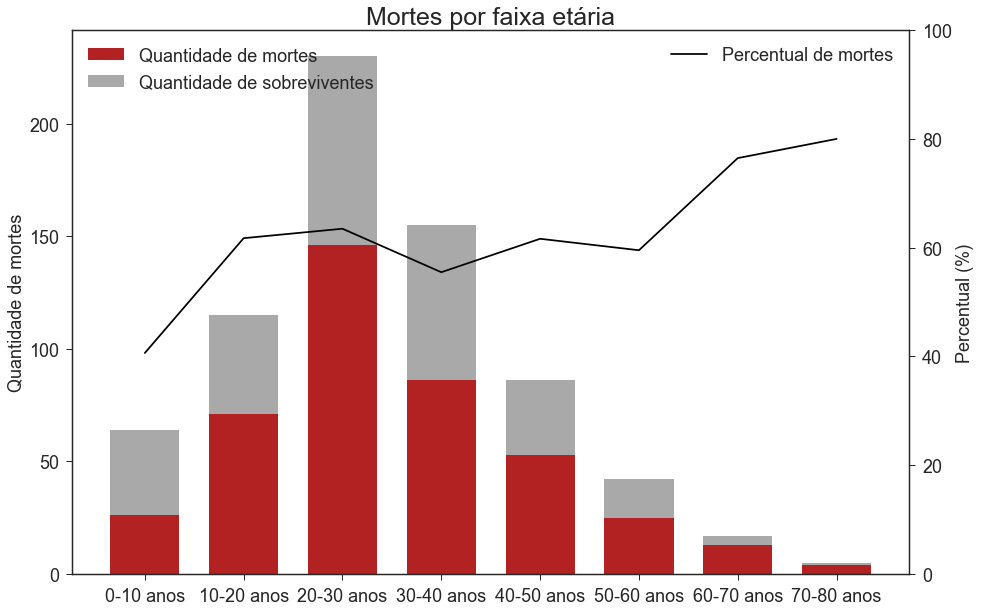

In [133]:
# Dados dos gráficos
fig, ax1 = mpl.pyplot.subplots(figsize=(15, 10))
eixo_x1 = np.arange(len(grouped_df1))
eixo_y_mortes = grouped_df1[0].values
eixo_y_sobreviventes = grouped_df1[1].values
eixo_y_proporcao_mortes = grouped_df1['0/total (%)'].values

# Estilo dos gráficos
sns.set(style='ticks')
mpl.pyplot.ylabel('Quantidade de mortes', fontsize=18)
mpl.pyplot.title('Mortes por faixa etária', fontsize=25)
ax1.tick_params(labelsize=18)

# Chamando os gráficos de barras
ax1.bar(eixo_x1, eixo_y_mortes, 0.7, color='firebrick', tick_label=grouped_df1.index.values.tolist(), label='Quantidade de mortes');
ax1.bar(eixo_x1, eixo_y_sobreviventes, 0.7, color='darkgray', bottom=eixo_y_mortes, label='Quantidade de sobreviventes')
mpl.pyplot.legend(prop={'size': 18}, loc = 2);

# Gráfico de linha
ax2 = ax1.twinx()
ax2.plot(eixo_x1, eixo_y_proporcao_mortes, 'k-', label='Percentual de mortes')
ax2.set_ylim(0, 100)
ax2.set_ylabel('Percentual (%)')
ax2.tick_params(labelsize=18)
ax2.yaxis.label.set_size(18)
mpl.pyplot.legend(prop={'size': 18}, loc = 1);

### Etapa 4: Tomada de conclusões
A partir dos dados acima, conclui-se que:
- A faixa etária com maior número de mortes em valores absolutos foi aquela de 20 a 30 anos, com 146 mortes;
- A faixa etária com maior número de mortes em valores relativos (ou seja, com controle pelo número de pessoas dessa faixa etária que estavam no navio) foi aquela de 70 a 80 anos, com morte de 80% dos passageiros;
- A faixa etária com *menor* número de mortes em valores absolutos foi também aquela de 70 a 80 anos, com 4 mortes;
- A faixa etária com menor número de mortes em valores relativos foi aquela de 0 a 10 anos, com morte de 40,62% dos passageiros.

## Pergunta 2: Qual foi o sexo mais presente no Titanic?
### Etapa 2: Limpeza dos dados
Os dados necessários são:
- Número de passageiros de cada sexo, representado pela coluna `sex`.

Para a pergunta 1, já foi verificado se há linhas duplicadas no DataFrame. Precisamos apenas conferir os valores da coluna `sex`.

In [134]:
# Verificando a existência de valores vazios em 'sex'
if df.sex.isnull().values.any() == True:
    print('Há valores vazios em sex.')
else:
    print('Não há valores vazios em sex.')

Não há valores vazios em sex.


In [135]:
# Verificando o tipo de dados da coluna 'sex'
df.sex.unique()

array(['male', 'female'], dtype=object)

In [136]:
# Traduzindo os valores
df['sex'] = df['sex'].apply(lambda x: 'masculino' if x == 'male' else 'feminino')
# Verificando
df.sex.unique()

array(['masculino', 'feminino'], dtype=object)

Cada um dos passageiros tem um sexo assinalado. Isso já nos permite visualizar os dados facilmente.

### Etapa 3: Análise dos dados em si para resposta à Pergunta 2
Criando DataFrame com os dados (quantidade de passageiros por sexo):

In [137]:
sex_data = pd.DataFrame(df.sex.value_counts())
sex_data

,sex
masculino,577
feminino,314


Adicionando valores proporcionais:

In [138]:
sex_data['sex_proportion (%)'] = ((sex_data/sex_data.sum())*100).round(2)
sex_data

,sex,sex_proportion (%)
masculino,577,64.76
feminino,314,35.24


Criando gráficos que exibam os números de passageiros de cada sexo ("*male*" ou "*female*"):

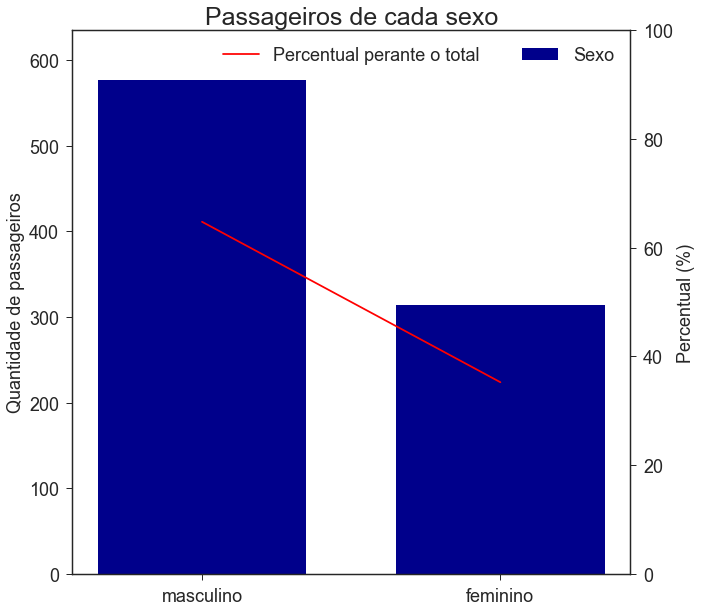

In [139]:
# Dados do gráfico
fig, ax1 = mpl.pyplot.subplots(figsize=(10, 10))
eixo_x2 = np.arange(len(sex_data['sex'].value_counts()))
eixo_y2 = sex_data['sex'].values
eixo_y_proporcao_sexo = sex_data['sex_proportion (%)'].values

# Estilo dos gráficos
sns.set(style='ticks')
mpl.pyplot.ylabel('Quantidade de passageiros', fontsize=18)
mpl.pyplot.title('Passageiros de cada sexo', fontsize=25)
ax1.tick_params(labelsize=18)

# Chamando o gráfico de barras
ax1.bar(eixo_x2, eixo_y2, 0.7, color='darkblue', tick_label=sex_data.index.values.tolist(), label='Sexo');
mpl.pyplot.legend(prop={'size': 18}, loc = 0);
mpl.pyplot.margins(y=0.1)

# Gráfico de linha
ax2 = ax1.twinx()
ax2.plot(eixo_x2, eixo_y_proporcao_sexo, 'r-', label='Percentual perante o total')
ax2.set_ylim(0, 100)
ax2.set_ylabel('Percentual (%)')
ax2.tick_params(labelsize=18)
ax2.yaxis.label.set_size(18)
mpl.pyplot.legend(prop={'size': 18}, loc = 9);

### Etapa 4: Tomada de conclusões
A partir dos dados acima, conclui-se que:
- O sexo mais presente em valores absolutos foi o sexo masculino, com 577 passageiros (64,76% dos passageiros).

## Pergunta 3: Qual foi a média de preço do ticket?
### Etapa 2: Limpeza dos dados
Os dados necessários são:
- Médias dos preços dos tickets, dados na coluna `fare`.

Para a pergunta 1, já foi verificado se há linhas duplicadas no DataFrame. Precisamos apenas conferir os valores da coluna `fare`.

In [140]:
# Verificando estatísticas sobre os preços dos tickets
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Algumas coisas chamam a atenção:
- Os dados contêm registro de tickets vendidos de graça, o que pode ser um erro;
- O valor máximo também tem um preço muito, muito superior ao valor médio;
- Existe variedade muito grande de preços entre os diferentes quartis.

Vamos conferir visualmente os valores exatos dos tickets:

In [141]:
set(df.fare.unique().tolist())

{0.0,
 4.0125,
 5.0,
 6.2375,
 6.4375,
 6.45,
 6.4958,
 6.75,
 6.8583,
 6.95,
 6.975,
 7.0458,
 7.05,
 7.0542,
 7.125,
 7.1417,
 7.225,
 7.2292,
 7.25,
 7.3125,
 7.4958,
 7.5208,
 7.55,
 7.6292,
 7.65,
 7.725,
 7.7292,
 7.7333,
 7.7375,
 7.7417,
 7.75,
 7.775,
 7.7875,
 7.7958,
 7.8,
 7.8292,
 7.8542,
 7.875,
 7.8792,
 7.8875,
 7.8958,
 7.925,
 8.0292,
 8.05,
 8.1125,
 8.1375,
 8.1583,
 8.3,
 8.3625,
 8.4042,
 8.4333,
 8.4583,
 8.5167,
 8.6542,
 8.6625,
 8.6833,
 8.7125,
 8.85,
 9.0,
 9.2167,
 9.225,
 9.35,
 9.475,
 9.4833,
 9.5,
 9.5875,
 9.825,
 9.8375,
 9.8417,
 9.8458,
 10.1708,
 10.4625,
 10.5,
 10.5167,
 11.1333,
 11.2417,
 11.5,
 12.0,
 12.275,
 12.2875,
 12.35,
 12.475,
 12.525,
 12.65,
 12.875,
 13.0,
 13.4167,
 13.5,
 13.7917,
 13.8583,
 13.8625,
 14.0,
 14.1083,
 14.4,
 14.4542,
 14.4583,
 14.5,
 15.0,
 15.0458,
 15.05,
 15.1,
 15.2458,
 15.5,
 15.55,
 15.7417,
 15.75,
 15.85,
 15.9,
 16.0,
 16.1,
 16.7,
 17.4,
 17.8,
 18.0,
 18.75,
 18.7875,
 19.2583,
 19.5,
 19.9667,
 20.2

Realmente existem preços muito diferentes. Também é estranha a existência de várias casas decimais.
De acordo com o fórum de discussão do link da documentação, conseguimos algumas informações sobre os ticekts:
- [Gareth Jones](https://www.kaggle.com/c/titanic/discussion/33087): é possível que os preços variem em razão do quão cedo ou tarde o ticket foi comprado em relação à data da viagem;
- [Nick Yee](https://www.kaggle.com/c/titanic/discussion/33087#183182): os preços não são por pessoa: os tickets eram vendidos para uma família como um todo, de modo que os valores em `fare` são o preço dos tickets da família dividido pelo número de pessoas da família; há preços reduzidos diferentes para menores de 12 anos e de 1 ano; alguns tickets da terceira classe tinham passagem de trem incluída no preço; alguns tickets (principalmente da terceira classe) mudavam de preço a depender do país de compra;
- [Daniel Burrueco](https://www.kaggle.com/c/titanic/discussion/37630#210625): As casas decimais decorrem da adoção de um sistema não centesimal pela Grã-Bretanha à época.

As diferenças nos preços são um problema. Uma média de preços de todos passageiros do navio tem sua utilidade reduzida, considerando tantas coisas que influenciam no preço do ticket que nos são desconhecidas (data da compra; detalhes sobre a precificação para crianças e adolescentes, que [é relatada de maneiras diferentes](https://www.encyclopedia-titanica.org/community/threads/children-on-the-titanic.20096/#post-254451); preços das passagens de trens dos tickets de terceira classe; informações sobre o país de compra de cada ticket). Apenas a questão da venda dos tickets para uma família não é um problema, afinal, realmente estamos buscando o preço médio por pessoa (informação que temos), e não por família.

Por outro lado, as casas decimais não são um problema: são apenas uma atualização de valores.

Em conclusão: como não conseguimos controlar as diferentes variáveis na composição do preço do ticket, devemos deixar claro, na resposta à pergunta, que a média do preço é afetada por variáveis desconhecidas, tais como detalhes sobre a precificação do ticket para crianças/adolescentes, a inclusão de passagem de trem no preço do ticket e a origem do passageiro.

Resta saber como lidar com as passagens gratuitas. A diferença de preços entre as passagens não é um erro, mas, talvez, as passagens gratuitas sejam. As passagens gratuitas foram dos seguintes passageiros:

In [142]:
df.query('fare == 0')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
179,180,0,3,"Leonard, Mr. Lionel",masculino,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",masculino,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",masculino,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",masculino,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",masculino,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",masculino,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",masculino,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",masculino,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",masculino,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",masculino,NaN,0,0,112052,0.0,NaN,S


Há relatos sobre alguns deles:
- William Harrison era secretário pessoal de chefe da empresa responsável pelo Titanic [(link)](https://www.encyclopedia-titanica.org/titanic-victim/william-harrison.html);
- Jonkheer Johan George Reuchlin era também integrante do grupo de empresas responsável pelo navio [(link)](https://www.encyclopedia-titanica.org/titanic-victim/johan-george-reuchlin.html);
- Outros sete dos passageiros listados foram enviados pela empresa que construiu o navio para acompanhá-lo em sua viagem inaugural [(link)](https://www.encyclopedia-titanica.org/titanic-guarantee-group/).

Como se vê, há razões para a existência de tickets gratuitos, de modo que pode não ser razoável a eliminação desses dados.

Já temos dados relevantes para o cálculo da média e podemos seguir para a próxima etapa da análise.

### Etapa 3: Análise dos dados em si para resposta à Pergunta 2

In [143]:
# Calculando a média do preço das passagens
fare_mean = df.fare.describe()['mean']
fare_mean.round(2)

32.2

Mesmo que não tenha sido necessária a retirada dos tickets gratuitos da nossa amostra, é possível dizer que eles são apenas uma parte pequena dos dados. Podemos calcular o impacto da inclusão deles ou não na média de preços:

In [144]:
# Considerando que estamos falando de passagens gratuitas, a soma do preço das passagens é a mesma,
# sejam as passagens gratuitas contabilizadas ou não. No cálculo da média, a única diferença é
# a quantidade total de passagens vendidas. Podemos fazer uma função para a diferença da média com
# passagens gratuitas e sem passagens gratuitas.
def diferenca_media(media_com_gratuidades, quantidade_total, quantidade_de_gratuidades):
    """Calcula a diferença entre uma média de preços pagos se não forem contabilizadas gratuidades e a média se forem
    contabilizadas gratuidades.
    Argumentos:
        media_sem_gratuidades: média de preços pagos se as gratuidades forem contabilizadas;
        quantidade_total: quantidade total de ocorrências (pagamentos) contabilizados no cálculo da média, incluídas 
        as gratuidades.
        quantidade_de_gratuidades: quantidade de pagamentos gratuidos existentes.
    Retorna: float com a diferença entre as médias
    """
    soma_ocorrencias = media_com_gratuidades * quantidade_total
    media_sem_gratuidades = soma_ocorrencias / (quantidade_total-quantidade_de_gratuidades)
    return media_sem_gratuidades - media_com_gratuidades

# Verificando no nosso caso
fare_mean_difference = diferenca_media(fare_mean, df.fare.describe()['count'], len(df.query('fare == 0')))
fare_mean_difference

0.551441917270111

A diferença na média é, realmente, muito pequena. Em termos proporcionais:

In [145]:
print('A média sem gratuidades é {}% maior do que a média com gratuidades.'.format(
    ((fare_mean_difference / fare_mean)*100).round(2)))

A média sem gratuidades é 1.71% maior do que a média com gratuidades.


Podemos, por último, fazer um diagrama de extremos e quartis que demonstre a variação dos preços dos tickets:

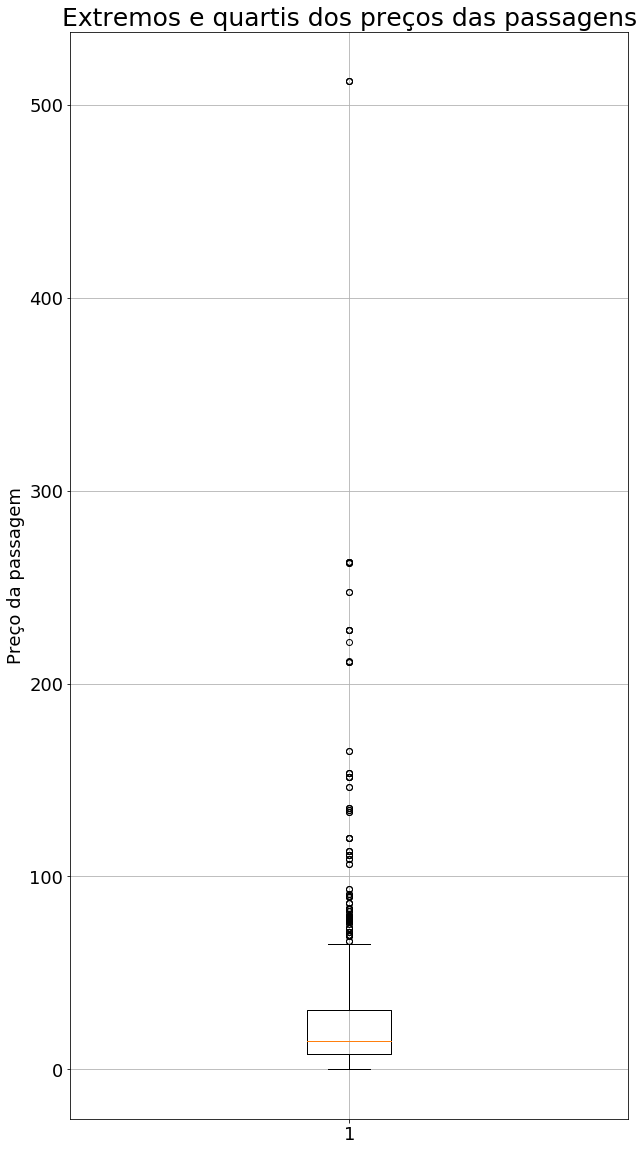

In [156]:
# Dados do gráfico
fig, ax1 = mpl.pyplot.subplots(figsize=(10, 20))
fare_data = df.fare

# Estilo dos gráficos
sns.reset_orig() # Precisamos desativar o seaborn porque ele oculta os 'fliers' que indicam os valores 'outliers' no gráfico.
mpl.pyplot.ylabel('Preço da passagem', fontsize=18)
mpl.pyplot.title('Extremos e quartis dos preços das passagens', fontsize=25)
ax1.tick_params(labelsize=18)
ax1.grid() # O gráfico fica melhos de ser lido se usarmos uma grade

# Chamando o gráfico
ax1.boxplot(fare_data);

### Etapa 4: Tomada de conclusões
A partir dos dados acima, conclui-se que:
- A média de preços é de 32,2. A documentação não deixa claro qual é a moeda utilizada - sabe-se apenas que não é a moeda inglesa da época. Essa média de preços inclui passageiros que pagaram preços muito diferentes não só em razão da classe no navio (primeira, segunda ou terceira classe), mas também em razão de:
 - Data da compra em relação à data da viagem;
 - Precificação diferente para crianças e adolescentes;
 - Inclusão do preço de passagem de trem no ticket do Titanic;
 - Diferenciação do preço de acordo com o país de compra.